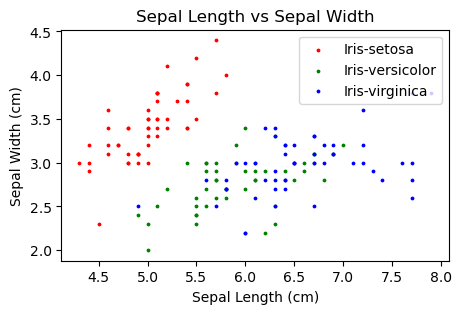

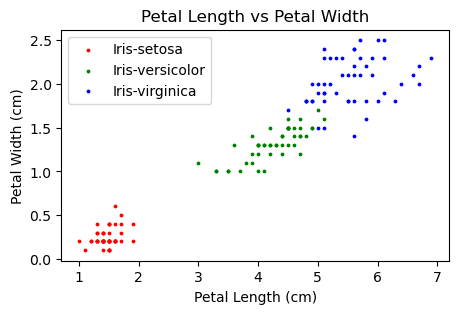

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url, header=None)
iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Define colors for different species
color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Plot Sepal Length vs Sepal Width
plt.figure(figsize=(5, 3))
for species, color in color_map.items():
    species_data = iris_data[iris_data['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], c=color, label=species, s=3)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
#plt.grid(True)
plt.show()

# Plot Petal Length vs Petal Width
plt.figure(figsize=(5, 3))
for species, color in color_map.items():
    species_data = iris_data[iris_data['species'] == species]
    plt.scatter(species_data['petal_length'], species_data['petal_width'], c=color, label=species, s=3)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
#plt.grid(True)
plt.show()


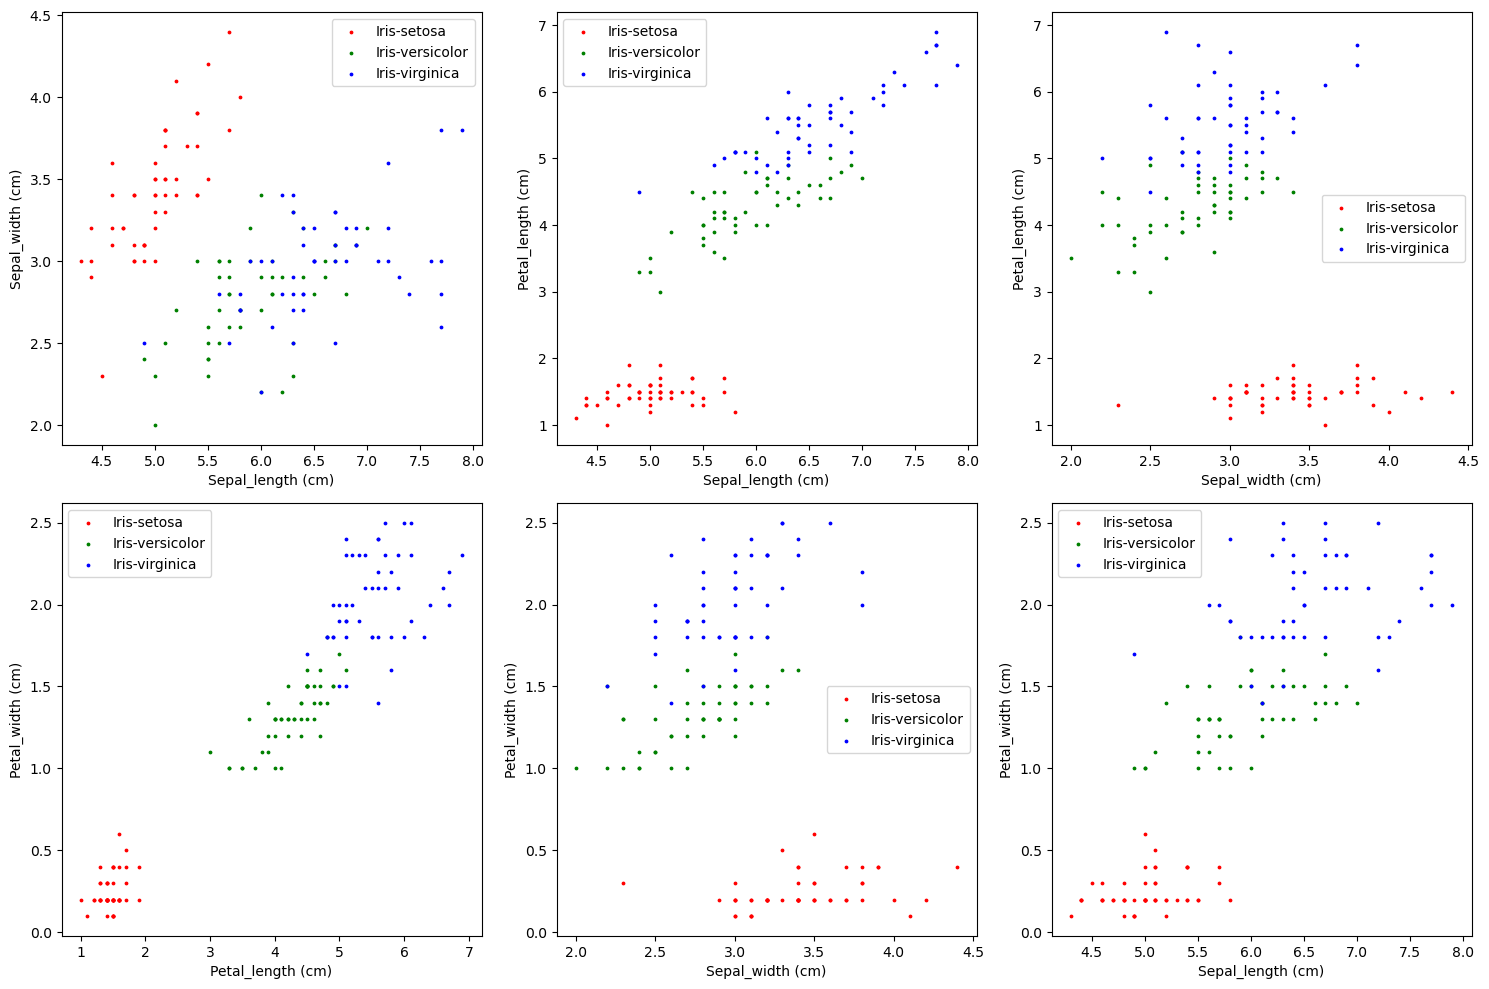

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url, header=None)
iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Define colors for different species
color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Plot all combinations
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Sepal Length vs Sepal Width, Petal Length vs Petal Width
for i, (x_feature, y_feature) in enumerate([('sepal_length', 'sepal_width'), ('petal_length', 'petal_width')]):
    for species, color in color_map.items():
        species_data = iris_data[iris_data['species'] == species]
        axs[i, 0].scatter(species_data[x_feature], species_data[y_feature], c=color, label=species, s=3)
        axs[i, 0].set_xlabel(f'{x_feature.capitalize()} (cm)')
        axs[i, 0].set_ylabel(f'{y_feature.capitalize()} (cm)')
        #axs[i, 0].set_title(f'{x_feature.capitalize()} vs {y_feature.capitalize()}')
        axs[i, 0].legend()

# Sepal Length vs Petal Length, Sepal Width vs Petal Width
for i, (x_feature, y_feature) in enumerate([('sepal_length', 'petal_length'), ('sepal_width', 'petal_width')]):
    for species, color in color_map.items():
        species_data = iris_data[iris_data['species'] == species]
        axs[i, 1].scatter(species_data[x_feature], species_data[y_feature], c=color, label=species, s=3)
        axs[i, 1].set_xlabel(f'{x_feature.capitalize()} (cm)')
        axs[i, 1].set_ylabel(f'{y_feature.capitalize()} (cm)')
        #axs[i, 1].set_title(f'{x_feature.capitalize()} vs {y_feature.capitalize()}')
        axs[i, 1].legend()

# Sepal Width vs Petal Length, Petal Width vs Sepal Length
for i, (x_feature, y_feature) in enumerate([('sepal_width','petal_length'), ('sepal_length','petal_width')]):
    for species, color in color_map.items():
        species_data = iris_data[iris_data['species'] == species]
        axs[i, 2].scatter(species_data[x_feature], species_data[y_feature], c=color, label=species, s=3)
        axs[i, 2].set_xlabel(f'{x_feature.capitalize()} (cm)')
        axs[i, 2].set_ylabel(f'{y_feature.capitalize()} (cm)')
        #axs[i, 2].set_title(f'{x_feature.capitalize()} vs {y_feature.capitalize()}')
        axs[i, 2].legend()

plt.tight_layout()
plt.show()


In [2]:
weak_learner = DecisionTreeClassifier(max_leaf_nodes=5)

# Inspect the first few rows of the data
print(iris_data.head())

# Separate features and target variable
X = iris_data.drop("species", axis=1)
y = iris_data["species"]

adaboost_classifier = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, algorithm='SAMME')

# Fit the model
adaboost_classifier.fit(X, y)



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_leaf_nodes=5))

In [3]:
# Try different values for n_estimators and learning_rate
n_estimators_values = [5, 10, 15]
learning_rate_values = [0.001, 0.05, 0.1]

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        # Define AdaBoost classifier with the specified parameters
        adaboost_classifier = AdaBoostClassifier(estimator=weak_learner, n_estimators=n_estimators, learning_rate=learning_rate, algorithm='SAMME')

        # Fit the model
        adaboost_classifier.fit(X, y)

        # Evaluate the performance (e.g., using cross-validation or train-test split)
        accuracy = adaboost_classifier.score(X, y)
        print(f"n_estimators={n_estimators}, learning_rate={learning_rate}, Accuracy={accuracy}")

n_estimators=5, learning_rate=0.001, Accuracy=0.98
n_estimators=5, learning_rate=0.05, Accuracy=0.98
n_estimators=5, learning_rate=0.1, Accuracy=0.98
n_estimators=10, learning_rate=0.001, Accuracy=0.98
n_estimators=10, learning_rate=0.05, Accuracy=0.98
n_estimators=10, learning_rate=0.1, Accuracy=0.9933333333333333
n_estimators=15, learning_rate=0.001, Accuracy=0.98
n_estimators=15, learning_rate=0.05, Accuracy=0.98
n_estimators=15, learning_rate=0.1, Accuracy=0.9933333333333333


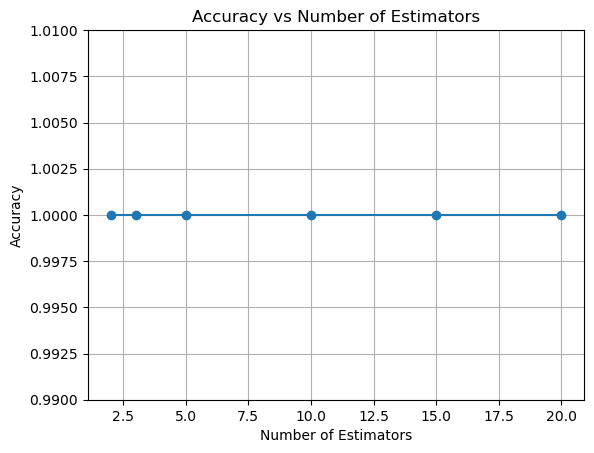

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize lists to store accuracy and number of estimators
accuracies = []
n_estimators_list = [2, 3, 5, 10, 15, 20]

# Train the AdaBoost classifier with different numbers of estimators
for n_estimators in n_estimators_list:
    adaboost_classifier = AdaBoostClassifier(estimator=weak_learner, n_estimators=n_estimators, learning_rate=0.001, algorithm='SAMME')
    adaboost_classifier.fit(X_train, y_train)
    accuracy = adaboost_classifier.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot accuracy as a function of the number of estimators
plt.plot(n_estimators_list, accuracies, marker='o')
plt.ylim(0.99,1.01)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.grid(True)
plt.show()


Mean Accuracy: 1.0


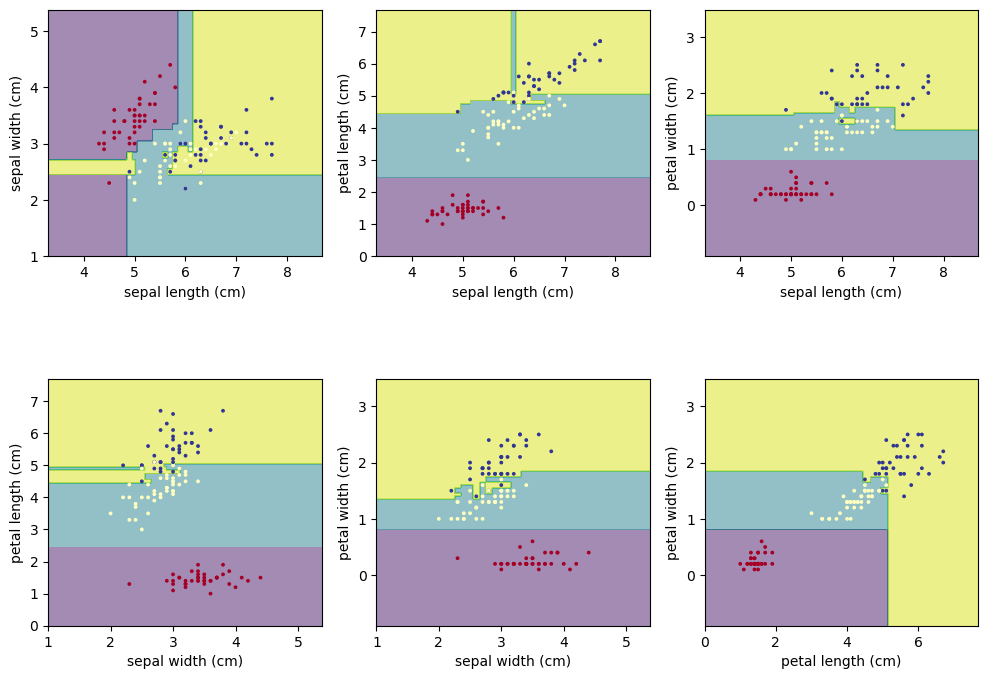

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

base_estimator = DecisionTreeClassifier(max_leaf_nodes=5)

adaboost_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf.fit(X_train, y_train)
accuracy = adaboost_clf.score(X_test, y_test)
print("Mean Accuracy:", accuracy)

feature_names = iris.feature_names
plt.figure(figsize=(12, 8))
plot_idx = 1
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        plt.subplot(2, 3, plot_idx)
        plt.subplots_adjust(hspace=0.5)
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])

        X_pair = X_train[:, [i, j]]
        adaboost_clf.fit(X_pair, y_train)

        # Plot decision boundary
        x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
        y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        Z = adaboost_clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.5)

        plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_train, cmap=plt.cm.RdYlBu, s=3)
        #plt.title("{} vs {}".format(feature_names[i], feature_names[j]))
        plot_idx += 1

plt.show()
